# Let's understand MET dataset

load `.csv` file and analyze the data

In [1]:
import numpy as np
import copy
import os
import sys
import math
from tqdm import tqdm
from scripts import dataset
from scripts import config

from matplotlib import pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
# Let's load dataset
dataset_name = 'met'

if dataset_name not in ['met', 'lsp', 'mpii']:
    raise ValueError('Unknown dataset: {}'.format(dataset_name))

if dataset_name == 'mpii':
    TEST_CV_FILEPATH = os.path.join(config.MPII_DATASET_ROOT, 'test_joints.csv')
    IMG_PATH_PREFIX = os.path.join(config.MPII_DATASET_ROOT, 'images')
    symmetric_joints = "[[12, 13], [11, 14], [10, 15], [2, 3], [1, 4], [0, 5]]"
    ignore_label = -100500
elif dataset_name == 'lsp': # LSP dataset
    TEST_CV_FILEPATH = os.path.join(config.LSP_DATASET_ROOT, 'test_joints.csv')
    IMG_PATH_PREFIX = os.path.join(config.LSP_DATASET_ROOT, 'images')
    symmetric_joints = "[[8, 9], [7, 10], [6, 11], [2, 3], [1, 4], [0, 5]]"
    ignore_label = -1
elif dataset_name == 'met': # MET dataset
    #TEST_CV_FILEPATH = os.path.join(config.MET_DATASET_ROOT, 'activity1.csv') # test only one image
    #TEST_CV_FILEPATH = os.path.join(config.MET_DATASET_ROOT, 'activity.csv')
    #TEST_CV_FILEPATH = os.path.join(config.MET_DATASET_ROOT, 'activity_with_head.csv')
    #TEST_CV_FILEPATH = os.path.join(config.MET_DATASET_ROOT, 'activity_wo.csv')
    #TEST_CV_FILEPATH = os.path.join(config.MET_DATASET_ROOT, 'activity_wo_ub.csv') # cleaned up
    TEST_CV_FILEPATH = os.path.join(config.MET_DATASET_ROOT, 'activity_20180618.csv') # joint rechecked! (2018.06.18) 
    #TEST_CV_FILEPATH = os.path.join(config.MET_DATASET_ROOT, 'activity-met_n10.csv') # joint rechecked! (2018.06.18)    
    # for debugging
    #TEST_CV_FILEPATH = os.path.join(config.MET_DATASET_ROOT, 'writing46.csv')  # with valid joints info
    #TEST_CV_FILEPATH = os.path.join(config.MET_DATASET_ROOT, 'writing46nv.csv')  # without valid joints info

    IMG_PATH_PREFIX = os.path.join(config.MET_DATASET_ROOT)
    symmetric_joints = "[[8, 9], [7, 10], [6, 11], [2, 3], [1, 4], [0, 5]]"
    ignore_label = -1
else:
    pass
 
    
print(TEST_CV_FILEPATH)
print(IMG_PATH_PREFIX)

test_dataset = dataset.PoseDataset(
    TEST_CV_FILEPATH,
    IMG_PATH_PREFIX, 227,
    fliplr=False, rotate=False,
    shift=None,
    #bbox_extension_range=(1.0, 1.0),
    bbox_extension_range=(1.4, 1.4),
    coord_normalize=True,
    gcn=True,
    fname_index=0,
    joint_index=1,
    symmetric_joints=symmetric_joints,
    ignore_label=ignore_label,
    should_return_bbox=True,
    should_downscale_images=True,
    downscale_height=400
)

print("data ready")

14it [00:00, 97.85it/s]

/var/data/MET2/activity_20180618.csv
/var/data/MET2
Reading dataset from /var/data/MET2/activity_20180618.csv
Downscale images to the height 400px


33it [00:00, 71.30it/s]

/var/data/MET2/image/office activities/walking about/33.png contains non-valid joints
[0 1 1 1 1 1 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/walking about/4.png contains non-valid joints
[0 1 1 1 1 1 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/walking about/40.jpg contains non-valid joints
[0 1 1 1 1 1 1 1 1 1 1 1 1 1]


53it [00:00, 72.13it/s]

/var/data/MET2/image/office activities/walking about/46.jpg contains non-valid joints
[1 1 1 1 1 1 1 1 0 1 1 1 1 1]
/var/data/MET2/image/office activities/walking about/54.jpg contains non-valid joints
[0 1 1 1 1 1 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/walking about/58.png contains non-valid joints
[1 1 1 1 1 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/writing/1.bmp contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/writing/10.bmp contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/writing/11.bmp contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 0 0 1 1]
/var/data/MET2/image/office activities/writing/12.jpeg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/writing/14.bmp contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/writing/14.jpeg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 

119it [00:00, 142.51it/s]

/var/data/MET2/image/office activities/writing/47.jpeg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/writing/49.jpeg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/writing/5.jpg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/writing/50.jpeg contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/writing/51.jpeg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/writing/52.jpg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/writing/53.jpeg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/writing/54.jpeg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/writing/55.jpeg contains non-valid joints
[0 0 0 0 0 0 1 1 1 0 1 1 1 1]
/var

163it [00:01, 112.80it/s]

/var/data/MET2/image/office activities/reading.seated/28.jpg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/reading.seated/3.bmp contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/reading.seated/35.png contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/reading.seated/36.jpg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/reading.seated/37.jpg contains non-valid joints
[0 0 1 1 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/reading.seated/38.jpg contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/reading.seated/39.jpg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/reading.seated/4.jpg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/reading.seated/41.jpg conta

233it [00:01, 141.04it/s]

/var/data/MET2/image/office activities/reading.seated/59.jpg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/reading.seated/60.jpg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/reading.seated/8.jpg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/reading.seated/9.bmp contains non-valid joints
[0 0 1 1 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/typing/1.bmp contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/typing/10.bmp contains non-valid joints
[0 0 0 0 0 0 1 0 0 1 0 1 1 1]
/var/data/MET2/image/office activities/typing/11.bmp contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/typing/12.bmp contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/typing/13.bmp contains non-valid joints
[0 0 0 0 0 0 1 1 1 1

301it [00:01, 159.14it/s]

/var/data/MET2/image/office activities/lifting.packing/lifting/26.jpg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/lifting.packing/lifting/27.jpg contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/lifting.packing/lifting/28.jpg contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/lifting.packing/lifting/29.png contains non-valid joints
[0 0 1 1 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/lifting.packing/lifting/30.jpg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/lifting.packing/lifting/33.jpg contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/lifting.packing/lifting/34.jpg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/lifting.packing/lifting/39.jpg contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1

329it [00:02, 135.56it/s]

/var/data/MET2/image/office activities/lifting.packing/packing/30.png contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/lifting.packing/packing/31.png contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/lifting.packing/packing/32.png contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/lifting.packing/packing/35.png contains non-valid joints
[0 0 0 1 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/lifting.packing/packing/36.png contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/lifting.packing/packing/37.png contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/lifting.packing/packing/38.png contains non-valid joints
[0 1 1 1 1 1 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/lifting.packing/packing/39.png contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1

/home/yyoo/src/deeppose/scripts/dataset.py:153: UserWarning: Skipping joint with incorrect joints coordinates. They are out of the image.
image: /var/data/MET2/image/office activities/lifting.packing/packing/41.png, joint: [421. 779.], im.shape: (328, 622)
  'image: {}, joint: {}, im.shape: {}'.format(img_path, joints[i_joint], image_shape[:2]))


/var/data/MET2/image/office activities/lifting.packing/packing/40.png contains non-valid joints
[0 0 1 1 1 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/lifting.packing/packing/44.png contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/lifting.packing/packing/45.png contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/lifting.packing/packing/46.png contains non-valid joints
[0 0 1 1 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/lifting.packing/packing/47.png contains non-valid joints
[0 0 1 1 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/lifting.packing/packing/48.png contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/lifting.packing/packing/49.png contains non-valid joints
[0 0 1 1 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/lifting.packing/packing/50.png contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1

368it [00:02, 124.04it/s]

/var/data/MET2/image/office activities/lifting.packing/packing/54.png contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/lifting.packing/packing/55.png contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/lifting.packing/packing/58.png contains non-valid joints
[0 0 1 1 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/lifting.packing/packing/59.png contains non-valid joints
[0 0 1 1 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/lifting.packing/packing/60.png contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/lifting.packing/packing/7.png contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/lifting.packing/packing/9.png contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/filing.seated/1.bmp contains non-valid joints
[1 1 1 1 1 1 1 1 1 1 0 1 1 1]
/var/

407it [00:03, 132.46it/s]

/var/data/MET2/image/office activities/filing.seated/22.jpg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/filing.seated/24.jpg contains non-valid joints
[1 1 1 1 1 1 1 1 1 1 0 1 1 1]
/var/data/MET2/image/office activities/filing.seated/25.jpg contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/filing.seated/26.jpg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/filing.seated/27.jpg contains non-valid joints
[1 1 1 1 1 1 0 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/filing.seated/28.jpg contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/filing.seated/29.jpg contains non-valid joints
[0 1 1 0 0 0 1 1 1 1 1 1 1 0]
/var/data/MET2/image/office activities/filing.seated/3.bmp contains non-valid joints
[0 0 0 0 0 0 1 0 1 1 1 1 1 1]
/var/data/MET2/image/office activities/filing.seated/30.jpg contains non-

461it [00:03, 139.08it/s]

/var/data/MET2/image/office activities/filing.seated/58.jpg contains non-valid joints
[0 0 0 0 1 1 1 1 1 1 1 1 0 1]
/var/data/MET2/image/office activities/filing.seated/59.jpg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/filing.seated/6.bmp contains non-valid joints
[1 1 1 1 1 1 1 1 1 1 0 1 1 1]
/var/data/MET2/image/office activities/filing.seated/60.jpg contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/filing.stand/1.bmp contains non-valid joints
[0 0 1 1 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/filing.stand/10.bmp contains non-valid joints
[1 1 1 1 1 1 0 0 1 1 1 1 1 1]
/var/data/MET2/image/office activities/filing.stand/12.bmp contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 0 1 1 1]
/var/data/MET2/image/office activities/filing.stand/13.bmp contains non-valid joints
[1 1 1 1 1 1 0 0 1 1 1 1 1 1]
/var/data/MET2/image/office activities/filing.stand/14.bmp contains non-valid 

502it [00:03, 146.89it/s]

/var/data/MET2/image/miscellaneous occupational activity/cooking/18.jpg contains non-valid joints
[0 0 1 1 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/miscellaneous occupational activity/cooking/19.jpg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/miscellaneous occupational activity/cooking/20.jpg contains non-valid joints
[0 0 1 1 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/miscellaneous occupational activity/cooking/21.PNG contains non-valid joints
[0 0 1 1 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/miscellaneous occupational activity/cooking/22.PNG contains non-valid joints
[0 0 1 1 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/miscellaneous occupational activity/cooking/23.PNG contains non-valid joints
[0 0 1 1 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/miscellaneous occupational activity/cooking/24.PNG contains non-valid joints
[0 0 1 1 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/miscellaneous occupational activity/cooking/25.PNG contains non-valid joints
[0 0 1

555it [00:03, 147.68it/s]

/var/data/MET2/image/miscellaneous occupational activity/cooking/46.PNG contains non-valid joints
[0 0 1 1 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/miscellaneous occupational activity/cooking/47.PNG contains non-valid joints
[0 0 1 1 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/miscellaneous occupational activity/cooking/48.PNG contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/miscellaneous occupational activity/cooking/49.PNG contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/miscellaneous occupational activity/cooking/52.PNG contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/miscellaneous occupational activity/cooking/53.PNG contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 0 1 1 1]
/var/data/MET2/image/miscellaneous occupational activity/cooking/54.PNG contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/miscellaneous occupational activity/cooking/55.PNG contains non-valid joints
[0 0 1

614it [00:03, 154.04it/s]

/var/data/MET2/image/miscellaneous occupational activity/house cleaning/30.jpg contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/miscellaneous occupational activity/house cleaning/33.jpg contains non-valid joints
[0 0 1 1 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/miscellaneous occupational activity/house cleaning/35.png contains non-valid joints
[0 0 1 1 0 0 1 1 1 1 1 0 1 1]
/var/data/MET2/image/miscellaneous occupational activity/house cleaning/36.jpg contains non-valid joints
[0 0 1 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/miscellaneous occupational activity/house cleaning/37.jpg contains non-valid joints
[0 0 1 1 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/miscellaneous occupational activity/house cleaning/38.jpg contains non-valid joints
[1 1 1 1 1 1 1 1 1 1 1 1 0 1]
/var/data/MET2/image/miscellaneous occupational activity/house cleaning/39.jpg contains non-valid joints
[0 0 1 1 0 0 0 1 1 1 1 1 1 1]
/var/data/MET2/image/miscellaneous occupational activit

670it [00:04, 153.08it/s]

/var/data/MET2/image/miscellaneous occupational activity/machine work.light/36.jpg contains non-valid joints
[1 1 1 1 1 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/miscellaneous occupational activity/machine work.light/37.jpg contains non-valid joints
[0 1 1 1 1 1 1 1 1 1 1 1 1 1]
/var/data/MET2/image/miscellaneous occupational activity/machine work.light/38.png contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/miscellaneous occupational activity/machine work.light/39.jpg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/miscellaneous occupational activity/machine work.light/40.jpg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 0]
/var/data/MET2/image/miscellaneous occupational activity/machine work.light/43.jpg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/miscellaneous occupational activity/machine work.light/45.jpg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/miscel

717it [00:04, 154.73it/s]

/var/data/MET2/image/miscellaneous occupational activity/machine work.sawing/38.jpg contains non-valid joints
[0 0 1 1 1 1 1 1 1 1 1 1 1 1]
/var/data/MET2/image/miscellaneous occupational activity/machine work.sawing/39.jpg contains non-valid joints
[0 0 1 1 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/miscellaneous occupational activity/machine work.sawing/4.jpg contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/miscellaneous occupational activity/machine work.sawing/42.jpg contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/miscellaneous occupational activity/machine work.sawing/5.jpg contains non-valid joints
[1 0 0 0 0 0 1 1 1 1 0 0 1 1]
/var/data/MET2/image/miscellaneous occupational activity/machine work.sawing/50.jpeg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/miscellaneous occupational activity/machine work.sawing/51.jpg contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/

777it [00:04, 160.58it/s]

/var/data/MET2/image/resting/reclining/20.png contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/resting/reclining/7.png contains non-valid joints
[1 1 1 0 0 1 1 1 1 0 1 1 1 1]


/home/yyoo/src/deeppose/scripts/dataset.py:153: UserWarning: Skipping joint with incorrect joints coordinates. They are out of the image.
image: /var/data/MET2/image/resting/seated.quiet/31.jpg, joint: [382.5        403.33333333], im.shape: (400, 267)
  'image: {}, joint: {}, im.shape: {}'.format(img_path, joints[i_joint], image_shape[:2]))
843it [00:05, 167.17it/s]

/var/data/MET2/image/resting/seated.quiet/24.jpg contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/resting/seated.quiet/26.jpg contains non-valid joints
[1 1 0 0 1 1 1 1 1 1 1 1 1 1]
/var/data/MET2/image/resting/seated.quiet/31.jpg contains non-valid joints
[1 1 0 0 1 1 0 0 1 1 1 1 1 1]
/var/data/MET2/image/resting/sleeping/10.png contains non-valid joints
[1 1 1 1 1 1 1 1 1 1 1 0 1 1]
/var/data/MET2/image/resting/sleeping/16.png contains non-valid joints
[1 1 1 1 1 1 1 1 1 1 1 0 1 1]
/var/data/MET2/image/resting/sleeping/19.png contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/resting/sleeping/24.jpg contains non-valid joints
[1 1 1 1 1 1 1 1 1 1 1 0 1 1]


959it [00:05, 185.04it/s]

/var/data/MET2/image/resting/sleeping/30.jpg contains non-valid joints
[1 1 1 1 1 1 1 1 0 1 1 1 1 1]
/var/data/MET2/image/resting/sleeping/8.png contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
Joints shape: (14, 2)
data ready


number of images = 957
[531 632 731 727 634 542 945 936 948 951 921 932 949 948]


Text(0,0.5,'ratio of valid joints')

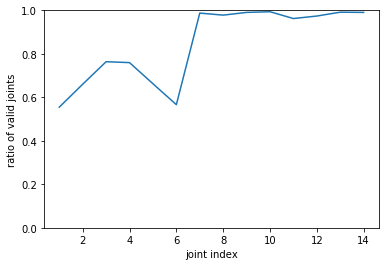

In [3]:
numImages = len(test_dataset.info)
print("number of images = {}".format(numImages))

validJoints = list()
for i, info in enumerate(test_dataset.info):
    #print(info[0])
    #validJoints.append(info[0])
    validJoints.append(info[0][:,0])   # only need X part of valid joints flag
validJoints = np.array(validJoints)  
#print(validJoints)

print(np.sum(validJoints,axis=0))

jointIndex = np.linspace(1,14,14)
plt.plot(jointIndex,np.sum(validJoints,axis=0)/numImages)
plt.ylim(0,1)
plt.xlabel('joint index')
plt.ylabel('ratio of valid joints')




## There are images without HEAD TOP!!!

89
image/office activities/writing/35.jpeg
379
image/office activities/filing.seated/29.jpg
487
image/miscellaneous occupational activity/cooking/10.jpg
488
image/miscellaneous occupational activity/cooking/11.jpg
490
image/miscellaneous occupational activity/cooking/13.jpg
601
image/miscellaneous occupational activity/machine work.light/4.png
637
image/miscellaneous occupational activity/machine work.light/40.jpg
658
image/miscellaneous occupational activity/machine work.sawing/1.jpg
714
image/miscellaneous occupational activity/machine work.sawing/57.jpg


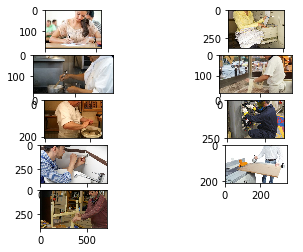

In [4]:
# images without joint 14 (head top)
idxMissing = list()
for i, info in enumerate(test_dataset.info):
    if validJoints[i,13] == 0:
        print(i)
        idxMissing.append(i)
        #print(info)

        image, joints, is_valid_joints, misc = test_dataset.get_example(i)
        print(misc['image_id'])
        #plt.imshow(image)

for i in range(len(idxMissing)):
    idx = idxMissing[i]
    #print(idx)
    plt.subplot(np.ceil(len(idxMissing)/2),2,i+1)

    img=test_dataset.get_original_image(idx)
    plt.imshow(img[:,:,::-1])

 

In [5]:

# # let's plot some of them  manually  
# plt.subplot(121)
# img=test_dataset.get_original_image(89)
# plt.imshow(img[:,:,::-1])

# plt.subplot(122)
# img=test_dataset.get_original_image(379)
# plt.imshow(img[:,:,::-1])


## Let's check joints in upper body

In [6]:
# how many images are missing any joint in upper body?    # increased from 61 to 90 (2018. 6. 18)
sum(np.sum(validJoints[:,6:],axis=1) != 8)

90

image/office activities/walking about/46.jpg
image/office activities/writing/11.bmp
image/office activities/writing/17.bmp
image/office activities/writing/19.bmp
image/office activities/writing/24.jpeg
image/office activities/writing/25.jpeg
image/office activities/writing/27.jpeg
image/office activities/writing/30.jpeg
image/office activities/writing/35.jpeg
image/office activities/writing/38.jpeg
image/office activities/writing/55.jpeg
image/office activities/writing/58.jpeg
image/office activities/reading.seated/17.jpg
image/office activities/reading.seated/23.png
image/office activities/reading.seated/25.png
image/office activities/typing/10.bmp
image/office activities/typing/33.bmp
image/office activities/lifting.packing/lifting/60.jpg
image/office activities/filing.seated/1.bmp
image/office activities/filing.seated/10.bmp
image/office activities/filing.seated/12.bmp
image/office activities/filing.seated/13.bmp
image/office activities/filing.seated/19.bmp
image/office activities/f

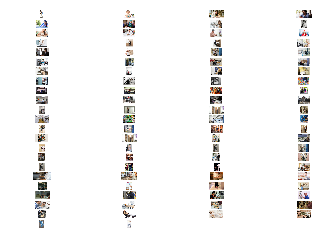

In [7]:
idxMissing = list()
missingImageIDlist = list()

for i, info in enumerate(test_dataset.info):
    if not np.all(validJoints[i,6:]):
        #print(i)
        idxMissing.append(i)
        #print(info)

        image, joints, is_valid_joints, misc = test_dataset.get_example(i)
        print(misc['image_id'])
        missingImageIDlist.append(misc['image_id'])
        #plt.imshow(image)

for i in range(len(idxMissing)):
    idx = idxMissing[i]
    #print(idx)
    plt.subplot(np.ceil(len(idxMissing)/4),4,i+1)

    img=test_dataset.get_original_image(idx)
    plt.imshow(img[:,:,::-1])
    plt.axis('off')

## generate list with whole upper body joints!

In [8]:
idxAllUB = list()
for i, info in enumerate(test_dataset.info):
    if np.all(validJoints[i,6:]):
        #print(i)
        idxAllUB.append(i)
        #print(info)

        image, joints, is_valid_joints, misc = test_dataset.get_example(i)
        print(misc['image_id'])
        #plt.imshow(image)

image/office activities/walking about/1.png
image/office activities/walking about/10.png
image/office activities/walking about/11.jpg
image/office activities/walking about/12.jpg
image/office activities/walking about/13.jpg
image/office activities/walking about/14.png
image/office activities/walking about/15.png
image/office activities/walking about/16.png
image/office activities/walking about/17.jpg
image/office activities/walking about/18.png
image/office activities/walking about/19.png
image/office activities/walking about/2.png
image/office activities/walking about/20.jpg
image/office activities/walking about/21.png
image/office activities/walking about/22.png
image/office activities/walking about/23.png
image/office activities/walking about/24.png
image/office activities/walking about/25.png
image/office activities/walking about/26.png
image/office activities/walking about/27.jpg
image/office activities/walking about/28.png
image/office activities/walking about/29.png
image/office

image/office activities/typing/51.bmp
image/office activities/typing/52.bmp
image/office activities/typing/53.bmp
image/office activities/typing/54.bmp
image/office activities/typing/55.bmp
image/office activities/typing/56.bmp
image/office activities/typing/57.bmp
image/office activities/typing/58.bmp
image/office activities/typing/59.bmp
image/office activities/typing/6.bmp
image/office activities/typing/60.bmp
image/office activities/typing/7.bmp
image/office activities/typing/8.bmp
image/office activities/typing/9.bmp
image/office activities/lifting.packing/lifting/1.png
image/office activities/lifting.packing/lifting/10.jpg
image/office activities/lifting.packing/lifting/11.jpg
image/office activities/lifting.packing/lifting/12.jpg
image/office activities/lifting.packing/lifting/13.jpg
image/office activities/lifting.packing/lifting/14.jpg
image/office activities/lifting.packing/lifting/15.jpg
image/office activities/lifting.packing/lifting/16.jpg
image/office activities/lifting.p

image/miscellaneous occupational activity/cooking/5.jpg
image/miscellaneous occupational activity/cooking/7.jpg
image/miscellaneous occupational activity/cooking/8.jpg
image/miscellaneous occupational activity/cooking/9.jpg
image/miscellaneous occupational activity/cooking/12.jpg
image/miscellaneous occupational activity/cooking/14.png
image/miscellaneous occupational activity/cooking/16.jpg
image/miscellaneous occupational activity/cooking/17.jpg
image/miscellaneous occupational activity/cooking/18.jpg
image/miscellaneous occupational activity/cooking/19.jpg
image/miscellaneous occupational activity/cooking/20.jpg
image/miscellaneous occupational activity/cooking/21.PNG
image/miscellaneous occupational activity/cooking/22.PNG
image/miscellaneous occupational activity/cooking/23.PNG
image/miscellaneous occupational activity/cooking/24.PNG
image/miscellaneous occupational activity/cooking/25.PNG
image/miscellaneous occupational activity/cooking/26.PNG
image/miscellaneous occupational ac

image/miscellaneous occupational activity/machine work.light/54.jpg
image/miscellaneous occupational activity/machine work.light/55.jpg
image/miscellaneous occupational activity/machine work.light/56.jpg
image/miscellaneous occupational activity/machine work.light/57.jpg
image/miscellaneous occupational activity/machine work.light/58.jpg
image/miscellaneous occupational activity/machine work.light/59.jpg
image/miscellaneous occupational activity/machine work.light/60.jpg
image/miscellaneous occupational activity/machine work.sawing/10.jpg
image/miscellaneous occupational activity/machine work.sawing/11.jpg
image/miscellaneous occupational activity/machine work.sawing/12.jpg
image/miscellaneous occupational activity/machine work.sawing/13.jpg
image/miscellaneous occupational activity/machine work.sawing/14.jpg
image/miscellaneous occupational activity/machine work.sawing/15.jpg
image/miscellaneous occupational activity/machine work.sawing/16.jpg
image/miscellaneous occupational activity

image/resting/sleeping/35.jpg
image/resting/sleeping/36.jpg
image/resting/sleeping/37.jpg
image/resting/sleeping/38.jpg
image/resting/sleeping/39.jpg
image/resting/sleeping/4.png
image/resting/sleeping/40.jpg
image/resting/sleeping/41.jpg
image/resting/sleeping/42.jpg
image/resting/sleeping/43.jpg
image/resting/sleeping/44.jpg
image/resting/sleeping/45.jpg
image/resting/sleeping/46.jpg
image/resting/sleeping/47.jpg
image/resting/sleeping/48.jpg
image/resting/sleeping/49.jpg
image/resting/sleeping/5.png
image/resting/sleeping/50.jpg
image/resting/sleeping/51.jpg
image/resting/sleeping/52.jpg
image/resting/sleeping/53.jpg
image/resting/sleeping/54.jpg
image/resting/sleeping/55.jpg
image/resting/sleeping/56.jpg
image/resting/sleeping/57.jpg
image/resting/sleeping/58.jpg
image/resting/sleeping/59.jpg
image/resting/sleeping/6.png
image/resting/sleeping/60.jpg
image/resting/sleeping/7.png
image/resting/sleeping/8.png
image/resting/sleeping/9.jpg
image/resting/standing.relaxed/1.png
image/res

In [9]:
import pandas as pd

# read the csv file again
MET2_joints=pd.read_csv(TEST_CV_FILEPATH,header=None) # ,index_col=0)
MET2_joints.head()
print(len(MET2_joints))



# select images with whole upper-body joints and save to a file
MET2_joints_UB = MET2_joints.iloc[idxAllUB]
MET2_joints_UB.head()
MET2_joints_UB.reset_index(drop=True, inplace=True)    # MUST RE-INDEX AFTER DROPNA!!!
print(len(MET2_joints_UB))

MET2_joints_UB.to_csv('activity_ub.csv',index=False, header=None)

959
867


In [10]:
# make sure missing image is not included
misc['image_id']
MET2_joints_UB_re=pd.read_csv('activity_ub.csv',header=None) # ,index_col=0)

MET2_joints_UB_re.head()

for missingImageID in missingImageIDlist:
    if np.sum(MET2_joints_UB[0] == missingImageIDlist[0]):
        print('problem!!!')
        print(missingImageID)


### copy generated files

```
cp activity_ub.csv /var/data/MET2/
scp activity_ub.csv alpha.inu.ac.kr:/var/data/MET2/
scp activity_ub.csv omega.inu.ac.kr:/var/data/MET2/
```

## Further analysis for class lables
Code from `shuffleData.ipynb`

In [11]:
# give column names 
numJoints = 14
# prepare column names 
colNames = list()
colNames.append('ID')
for n in range(numJoints):
    colNames.append("x{}".format(n+1))
    colNames.append("y{}".format(n+1))    
for n in range(numJoints):
    colNames.append("v{}".format(n+1))
#print(colNames)

MET2_joints.columns = colNames
MET2_joints_UB.columns = colNames
MET2_joints.head()
MET2_joints_UB.head()

,ID,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14
0,image/office activities/walking about/1.png,113,172,113,147,137,117,119,117,123,...,0,0,0,0,0,0,0,0,0,0
1,image/office activities/walking about/10.png,187,196,184,159,177,115,205,110,203,...,0,0,0,0,0,0,0,0,0,0
2,image/office activities/walking about/11.jpg,73,294,73,227,66,160,79,153,96,...,0,0,0,0,0,1,1,1,0,0
3,image/office activities/walking about/12.jpg,196,188,200,145,198,104,170,100,176,...,0,0,0,0,0,0,0,0,0,0
4,image/office activities/walking about/13.jpg,102,189,86,136,131,110,131,118,131,...,0,0,0,1,1,0,0,0,0,0


In [12]:
# generate (activity,MET) dictionary in the increasing order of MET

numClass=16     # whole model
#numClass=10    # without objects

from util import met
activity_MET = met.generate_activity_MET_dict(numClass)

print(activity_MET)
# for act in activity_MET:
#     print(act)

OrderedDict([('resting/sleeping', 0.7), ('resting/reclining', 0.8), ('resting.seated.quiet', 1.0), ('office activities/reading.seated', 1.0), ('office activities/writing', 1.0), ('office activities/typing', 1.1), ('resting/standing.relaxed', 1.2), ('office activities/filing.seated', 1.2), ('office activities/filing.stand', 1.4), ('miscellaneous occupational activity/cooking', 1.6), ('office activities/walking about', 1.7), ('miscellaneous occupational activity/machine work.sawing', 1.8), ('miscellaneous occupational activity/machine work.light', 2.0), ('miscellaneous occupational activity/house cleaning', 2.0), ('office activities/lifting.packing/lifting', 2.1), ('office activities/lifting.packing/packing', 2.1)])


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
resting/sleeping : MET=0.7, 60 samples
resting/reclining : MET=0.8, 60 samples
resting.seated.quiet : MET=1.0, 60 samples
office activities/reading.seated : MET=1.0, 60 samples
office activities/writing : MET=1.0, 60 samples
office activities/typing : MET=1.1, 60 samples
resting/standing.relaxed : MET=1.2, 60 samples
office activities/filing.seated : MET=1.2, 60 samples
office activities/filing.stand : MET=1.4, 60 samples
miscellaneous occupational activity/cooking : MET=1.6, 60 samples
office activities/walking about : MET=1.7, 60 samples
miscellaneous occupational activity/machine work.sawing : MET=1.8, 60 samples
miscellaneous occupational activity/machine work.light : MET=2.0, 60 samples
miscellaneous occupational activity/house cleaning : MET=2.0, 60 samples
office activities/lifting.packing/lifting : MET=2.1, 60 samples
office activities/lifting.packing/packing : MET=2.1, 59 samples


/home/yyoo/src/deeppose/util/met.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df["MET"][idx] = met


[0.7, 0.8, 1.0, 1.0, 1.0, 1.1, 1.2, 1.2, 1.4, 1.6, 1.7, 1.8, 2.0, 2.0, 2.1, 2.1]
[60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 59]


,ID,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,v6,v7,v8,v9,v10,v11,v12,v13,v14,MET
0,image/office activities/walking about/1.png,113,172,113,147,137,117,119,117,123,...,0,0,0,0,0,0,0,0,0,1.7
1,image/office activities/walking about/10.png,187,196,184,159,177,115,205,110,203,...,0,0,0,0,0,0,0,0,0,1.7
2,image/office activities/walking about/11.jpg,73,294,73,227,66,160,79,153,96,...,0,0,0,0,1,1,1,0,0,1.7
3,image/office activities/walking about/12.jpg,196,188,200,145,198,104,170,100,176,...,0,0,0,0,0,0,0,0,0,1.7
4,image/office activities/walking about/13.jpg,102,189,86,136,131,110,131,118,131,...,0,0,1,1,0,0,0,0,0,1.7


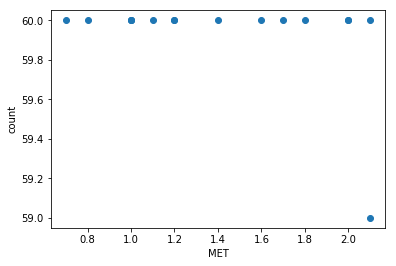

In [13]:
# add MET value and count the number of each activity

%load_ext autoreload
%autoreload 2
from util import met

MET2_joints, METs, counts =  met.parseMET(MET2_joints, activity_MET)

# check
print(METs)
print(counts)
plt.plot(METs, counts, 'o')
plt.xlabel('MET')
plt.ylabel('count')


MET2_joints.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
resting/sleeping : label=0, 60 samples
resting/reclining : label=1, 60 samples
resting.seated.quiet : label=2, 60 samples
office activities/reading.seated : label=3, 60 samples
office activities/writing : label=4, 60 samples
office activities/typing : label=5, 60 samples
resting/standing.relaxed : label=6, 60 samples


/home/yyoo/src/deeppose/util/met.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df["label"][idx] = int(label)


office activities/filing.seated : label=7, 60 samples
office activities/filing.stand : label=8, 60 samples
miscellaneous occupational activity/cooking : label=9, 60 samples
office activities/walking about : label=10, 60 samples
miscellaneous occupational activity/machine work.sawing : label=11, 60 samples
miscellaneous occupational activity/machine work.light : label=12, 60 samples
miscellaneous occupational activity/house cleaning : label=13, 60 samples
office activities/lifting.packing/lifting : label=14, 60 samples
office activities/lifting.packing/packing : label=15, 59 samples
[0.7, 0.8, 1.0, 1.0, 1.0, 1.1, 1.2, 1.2, 1.4, 1.6, 1.7, 1.8, 2.0, 2.0, 2.1, 2.1]
[60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 59]


,ID,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,v7,v8,v9,v10,v11,v12,v13,v14,MET,label
0,image/office activities/walking about/1.png,113,172,113,147,137,117,119,117,123,...,0,0,0,0,0,0,0,0,1.7,10
1,image/office activities/walking about/10.png,187,196,184,159,177,115,205,110,203,...,0,0,0,0,0,0,0,0,1.7,10
2,image/office activities/walking about/11.jpg,73,294,73,227,66,160,79,153,96,...,0,0,0,1,1,1,0,0,1.7,10
3,image/office activities/walking about/12.jpg,196,188,200,145,198,104,170,100,176,...,0,0,0,0,0,0,0,0,1.7,10
4,image/office activities/walking about/13.jpg,102,189,86,136,131,110,131,118,131,...,0,1,1,0,0,0,0,0,1.7,10


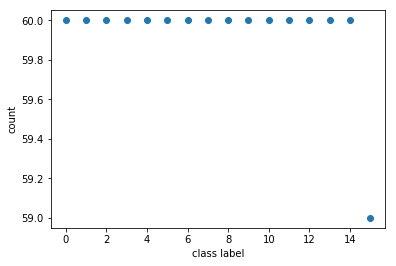

In [14]:
# add class label index 

%load_ext autoreload
%autoreload 2
from util import met

MET2_joints, labels, counts =  met.parseClassLabel(MET2_joints, activity_MET)

# check
print(METs)
print(counts)
plt.plot(labels, counts, 'o')
plt.xlabel('class label')
plt.ylabel('count')

MET2_joints.head()

In [15]:
# save 
MET2_joints.to_csv('activity-met.csv',index=False, header=None)
print(MET2_joints.shape)

(959, 45)


### repeat for UB data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
resting/sleeping : MET=0.7, 57 samples
resting/reclining : MET=0.8, 59 samples


/home/yyoo/src/deeppose/util/met.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['MET'] = np.NaN
/home/yyoo/src/deeppose/util/met.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df["MET"][idx] = met
/home/yyoo/tf3/lib/python3.5/site-packages/pandas/core/generic.py:7620: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/yyoo/tf3/lib/python3.5/site-packages/ipykernel_launcher.py:7: Sett

resting.seated.quiet : MET=1.0, 59 samples
office activities/reading.seated : MET=1.0, 57 samples
office activities/writing : MET=1.0, 49 samples
office activities/typing : MET=1.1, 58 samples
resting/standing.relaxed : MET=1.2, 58 samples
office activities/filing.seated : MET=1.2, 38 samples
office activities/filing.stand : MET=1.4, 35 samples
miscellaneous occupational activity/cooking : MET=1.6, 53 samples
office activities/walking about : MET=1.7, 59 samples
miscellaneous occupational activity/machine work.sawing : MET=1.8, 57 samples
miscellaneous occupational activity/machine work.light : MET=2.0, 55 samples
miscellaneous occupational activity/house cleaning : MET=2.0, 56 samples
office activities/lifting.packing/lifting : MET=2.1, 59 samples
office activities/lifting.packing/packing : MET=2.1, 58 samples
[0.7, 0.8, 1.0, 1.0, 1.0, 1.1, 1.2, 1.2, 1.4, 1.6, 1.7, 1.8, 2.0, 2.0, 2.1, 2.1]
[57, 59, 59, 57, 49, 58, 58, 38, 35, 53, 59, 57, 55, 56, 59, 58]


/home/yyoo/src/deeppose/util/met.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.dropna(inplace=True)


,ID,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,v6,v7,v8,v9,v10,v11,v12,v13,v14,MET
0,image/office activities/walking about/1.png,113,172,113,147,137,117,119,117,123,...,0,0,0,0,0,0,0,0,0,1.7
1,image/office activities/walking about/10.png,187,196,184,159,177,115,205,110,203,...,0,0,0,0,0,0,0,0,0,1.7
2,image/office activities/walking about/11.jpg,73,294,73,227,66,160,79,153,96,...,0,0,0,0,1,1,1,0,0,1.7
3,image/office activities/walking about/12.jpg,196,188,200,145,198,104,170,100,176,...,0,0,0,0,0,0,0,0,0,1.7
4,image/office activities/walking about/13.jpg,102,189,86,136,131,110,131,118,131,...,0,0,1,1,0,0,0,0,0,1.7


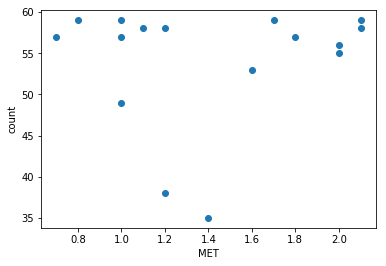

In [16]:
# add MET value and count the number of each activity

%load_ext autoreload
%autoreload 2
from util import met

MET2_joints_UB, METs, counts =  met.parseMET(MET2_joints_UB, activity_MET)

# check
print(METs)
print(counts)
plt.plot(METs, counts, 'o')
plt.xlabel('MET')
plt.ylabel('count')

MET2_joints_UB.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/yyoo/src/deeppose/util/met.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['label'] = np.NaN
/home/yyoo/src/deeppose/util/met.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df["label"][idx] = int(label)
/home/yyoo/tf3/lib/python3.5/site-packages/pandas/core/generic.py:7620: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/yyoo/tf3/lib/python3.5/site-packages/ipykernel_launcher

resting/sleeping : label=0, 57 samples
resting/reclining : label=1, 59 samples
resting.seated.quiet : label=2, 59 samples
office activities/reading.seated : label=3, 57 samples
office activities/writing : label=4, 49 samples
office activities/typing : label=5, 58 samples
resting/standing.relaxed : label=6, 58 samples
office activities/filing.seated : label=7, 38 samples
office activities/filing.stand : label=8, 35 samples
miscellaneous occupational activity/cooking : label=9, 53 samples
office activities/walking about : label=10, 59 samples
miscellaneous occupational activity/machine work.sawing : label=11, 57 samples
miscellaneous occupational activity/machine work.light : label=12, 55 samples
miscellaneous occupational activity/house cleaning : label=13, 56 samples
office activities/lifting.packing/lifting : label=14, 59 samples
office activities/lifting.packing/packing : label=15, 58 samples
[0.7, 0.8, 1.0, 1.0, 1.0, 1.1, 1.2, 1.2, 1.4, 1.6, 1.7, 1.8, 2.0, 2.0, 2.1, 2.1]
[57, 59, 59

/home/yyoo/src/deeppose/util/met.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df["label"] = df["label"].astype('int').astype('category')


,ID,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,v7,v8,v9,v10,v11,v12,v13,v14,MET,label
0,image/office activities/walking about/1.png,113,172,113,147,137,117,119,117,123,...,0,0,0,0,0,0,0,0,1.7,10
1,image/office activities/walking about/10.png,187,196,184,159,177,115,205,110,203,...,0,0,0,0,0,0,0,0,1.7,10
2,image/office activities/walking about/11.jpg,73,294,73,227,66,160,79,153,96,...,0,0,0,1,1,1,0,0,1.7,10
3,image/office activities/walking about/12.jpg,196,188,200,145,198,104,170,100,176,...,0,0,0,0,0,0,0,0,1.7,10
4,image/office activities/walking about/13.jpg,102,189,86,136,131,110,131,118,131,...,0,1,1,0,0,0,0,0,1.7,10


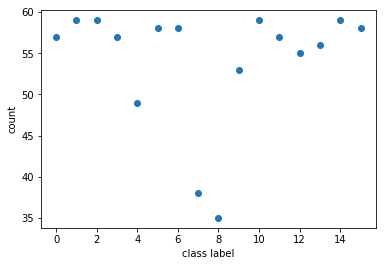

In [17]:
# add class label index 

%load_ext autoreload
%autoreload 2
from util import met

MET2_joints_UB, labels, counts =  met.parseClassLabel(MET2_joints_UB, activity_MET)

# check
print(METs)
print(counts)
plt.plot(labels, counts, 'o')

plt.xlabel('class label')
plt.ylabel('count')

MET2_joints_UB.head()

In [18]:
MET2_joints_UB.to_csv('activity-met_ub.csv',index=False, header=None)
print(MET2_joints_UB.shape)

(867, 45)


### copy generated files

```
cp activity-met.csv /var/data/MET2/
cp activity-met_ub.csv /var/data/MET2/

scp activity-met.csv alpha.inu.ac.kr:/var/data/MET2/
scp activity-met_ub.csv alpha.inu.ac.kr:/var/data/MET2/

scp activity-met.csv omega.inu.ac.kr:/var/data/MET2/
scp activity-met_ub.csv omega.inu.ac.kr:/var/data/MET2/

```